## Визуализация данных

### EDA - Exploratory Data Analisys - Исследовательский анализ данных

* Понимание как устроены данные
* Проверка фичей на адекватность
* Приведение фичей к "нормальному" виду
* Генерация новых фичей

### 3 шага
1. Распределение таргета
1. Распределение фичей
1. Графики влияния фичей на таргет

### Подключение билиотек

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Установить шрифт на графиках
matplotlib.rcParams.update({'font.size': 14})

#### Пути к данным

In [3]:
PREPARED_DATASET_PATH = 'data/housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

#### Загрузка данных

In [4]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,population_per_bedroom,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,2.732919,0.400621,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,2.956685,0.460641,0,0,0,1,0,2083.0


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_share,population_per_room,population_per_bedroom,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,4.993917,1.984176,0.405851,0.443314,0.316957,0.000242,0.110853,0.128634,2123.545252
std,2.003455,2.135854,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,1.239235,1.144835,0.256599,0.496788,0.465302,0.015563,0.313957,0.334802,32.332842
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.354023,0.002547,0.000670,0.000000,0.000000,0.000000,0.000000,0.000000,1675.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,4.164476,1.517159,0.314496,0.000000,0.000000,0.000000,0.000000,0.000000,2108.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,4.922250,1.937655,0.372556,0.000000,0.000000,0.000000,0.000000,0.000000,2108.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,5.706958,2.302608,0.445483,1.000000,1.000000,0.000000,0.000000,0.000000,2130.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,26.917241,55.222222,14.194444,1.000000,1.000000,1.000000,1.000000,1.000000,2197.000000


In [8]:
df.dtypes

longitude                 float64
latitude                  float64
housing_median_age        float64
total_rooms               float64
total_bedrooms            float64
population                float64
households                float64
median_income             float64
median_house_value        float64
ocean_proximity            object
bedroom_share             float64
population_per_room       float64
population_per_bedroom    float64
<1H OCEAN                   int64
INLAND                      int64
ISLAND                      int64
NEAR BAY                    int64
NEAR OCEAN                  int64
median_rooms              float64
dtype: object

In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [12]:
end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage is: {:.2f} MB'.format(end_mem))

Memory usage is: 2.99 MB


In [13]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.99 MB
Memory usage after optimization is: 1.14 MB
Decreased by 61.8%


In [14]:
df.dtypes

longitude                  float32
latitude                   float32
housing_median_age         float32
total_rooms                float32
total_bedrooms             float32
population                 float32
households                 float32
median_income              float32
median_house_value         float32
ocean_proximity           category
bedroom_share              float32
population_per_room        float32
population_per_bedroom     float32
<1H OCEAN                     int8
INLAND                        int8
ISLAND                        int8
NEAR BAY                      int8
NEAR OCEAN                    int8
median_rooms               float32
dtype: object

### 1. Распределение целевой переменной

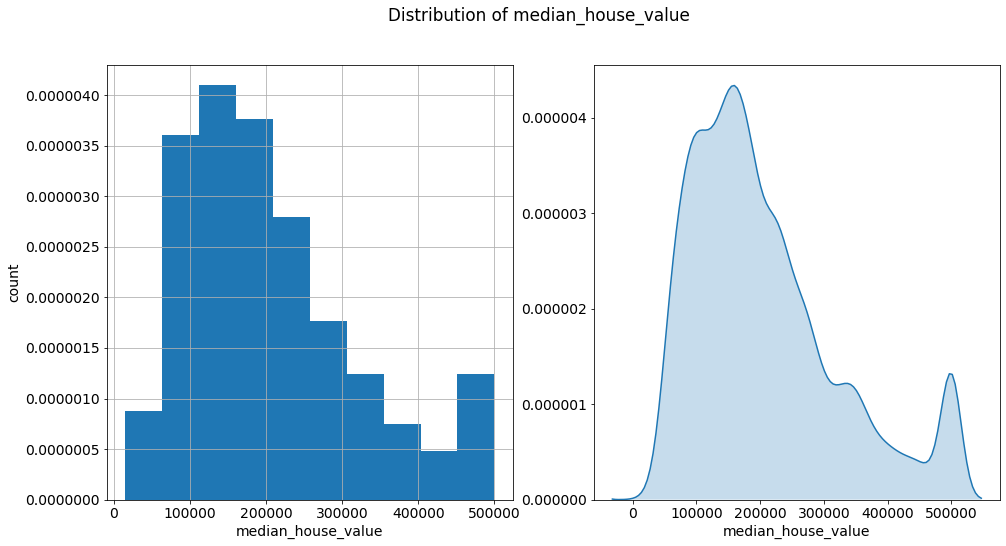

In [18]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=True)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [30]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(206855.0, 179700.0, 500001.0)

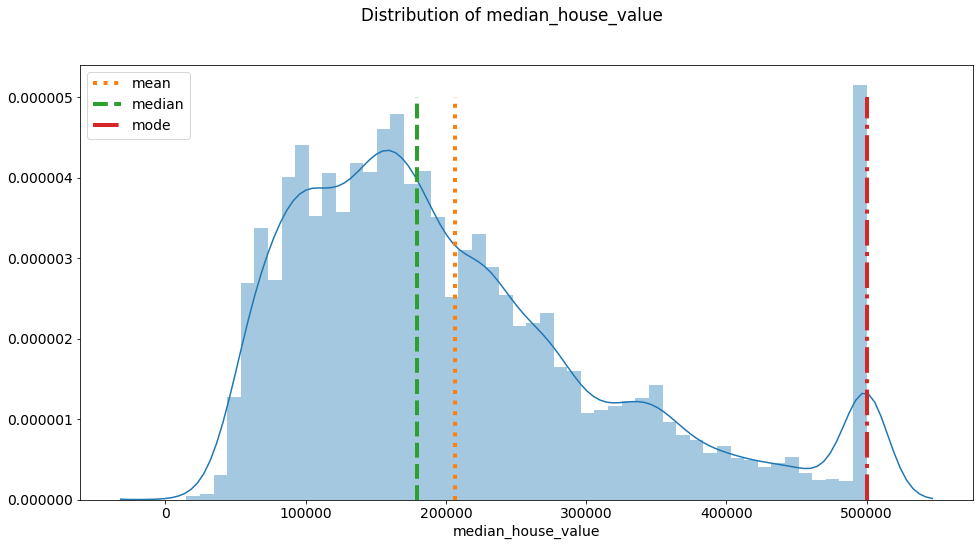

In [31]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean]* 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median]* 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode]* 100, y, label='mode', linestyle='-.', linewidth=4)

plt.suptitle('Distribution of median_house_value')
plt.legend()
plt.show()

In [32]:
target_bins = df['median_house_value'] // 10000 * 10000
target_adjusted_mode = target_bins.mode()[0]
target_adjusted_mode

160000.0

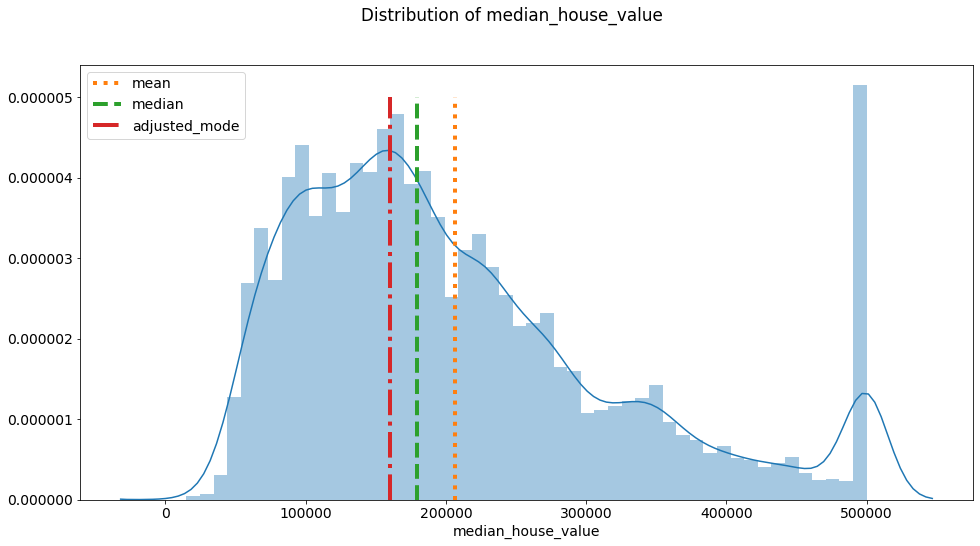

In [33]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean]* 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median]* 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode]* 100, y, label='adjusted_mode', linestyle='-.', linewidth=4)

plt.suptitle('Distribution of median_house_value')
plt.legend()
plt.show()

In [34]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

In [38]:
len(np.unique(target_bins))

50

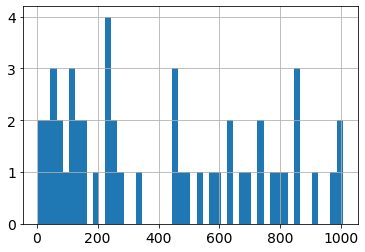

In [37]:
target_bins.value_counts().hist(bins=50)

## 2. Анализ признаков

### 2.1 Количественные признаки

In [42]:
df_num_features = df.select_dtypes(include=['float32', 'float64'])
df_num_features.drop('median_house_value', axis=1, inplace=True);

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


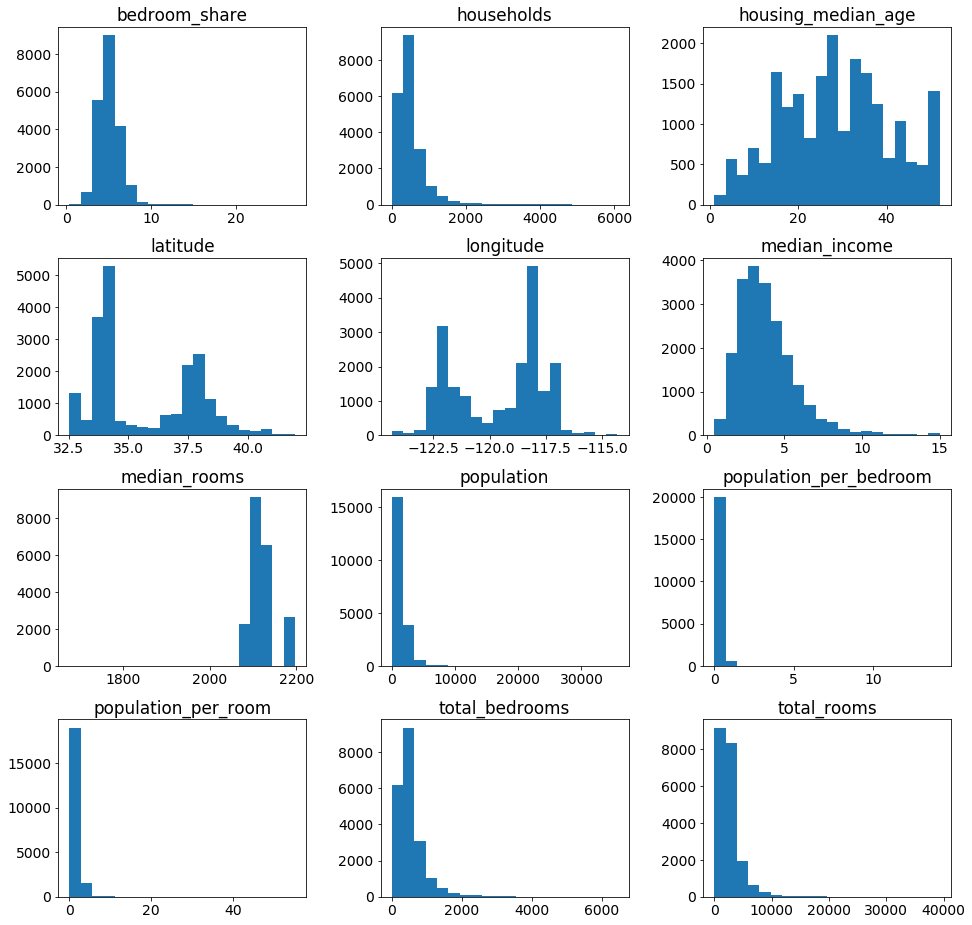

In [43]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

посмотрим распределения по отдельным графикам

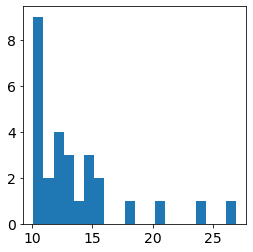

In [48]:
df_num_features.loc[df_num_features['bedroom_share'] > 10, 'bedroom_share'].\
    hist(figsize=(4, 4), bins=20, grid=False);

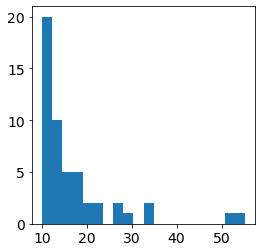

In [51]:
df_num_features.loc[df_num_features['population_per_room'] > 10, 'population_per_room'].\
    hist(figsize=(4, 4), bins=20, grid=False);

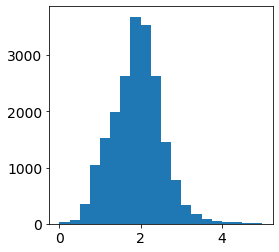

In [53]:
df_num_features.loc[df_num_features['population_per_room'] < 5, 'population_per_room'].\
    hist(figsize=(4, 4), bins=20, grid=False);

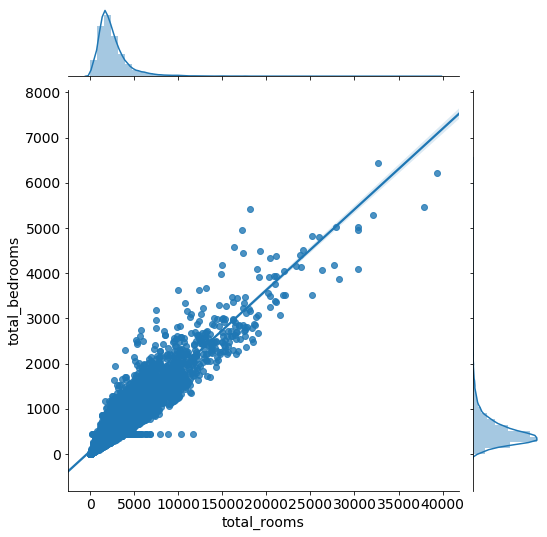

In [60]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind="reg")
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

есть выбросы в районе 450 - возможно замена медианой

In [61]:
df['total_bedrooms'].median()

435.0

In [63]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

посмотрим распределение по широте и долготе

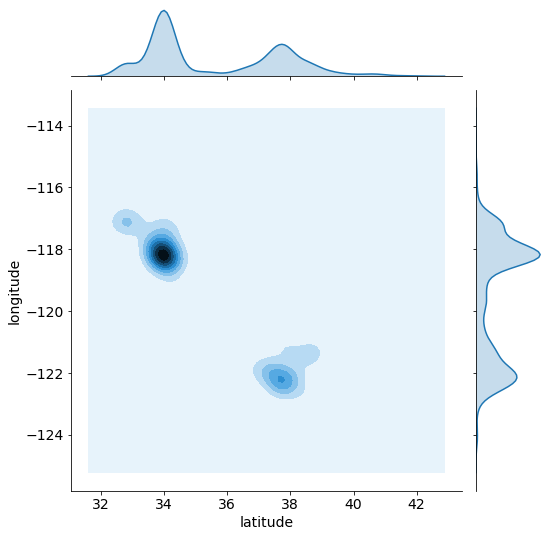

In [65]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

### 2.2 Категориальные признаки

In [68]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_share',
       'population_per_room', 'population_per_bedroom', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_rooms'],
      dtype='object')

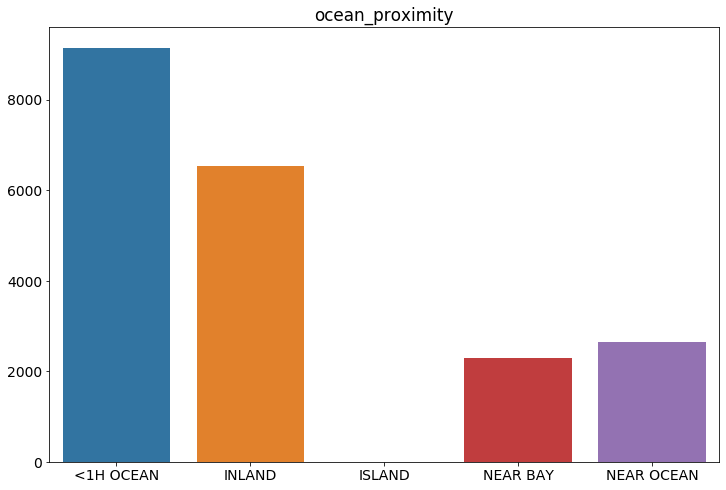

In [71]:
counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(12,8))
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)

plt.show()

### 2.3 Бинарные признаки

In [77]:
df_bin_features = df.select_dtypes(include="int8")

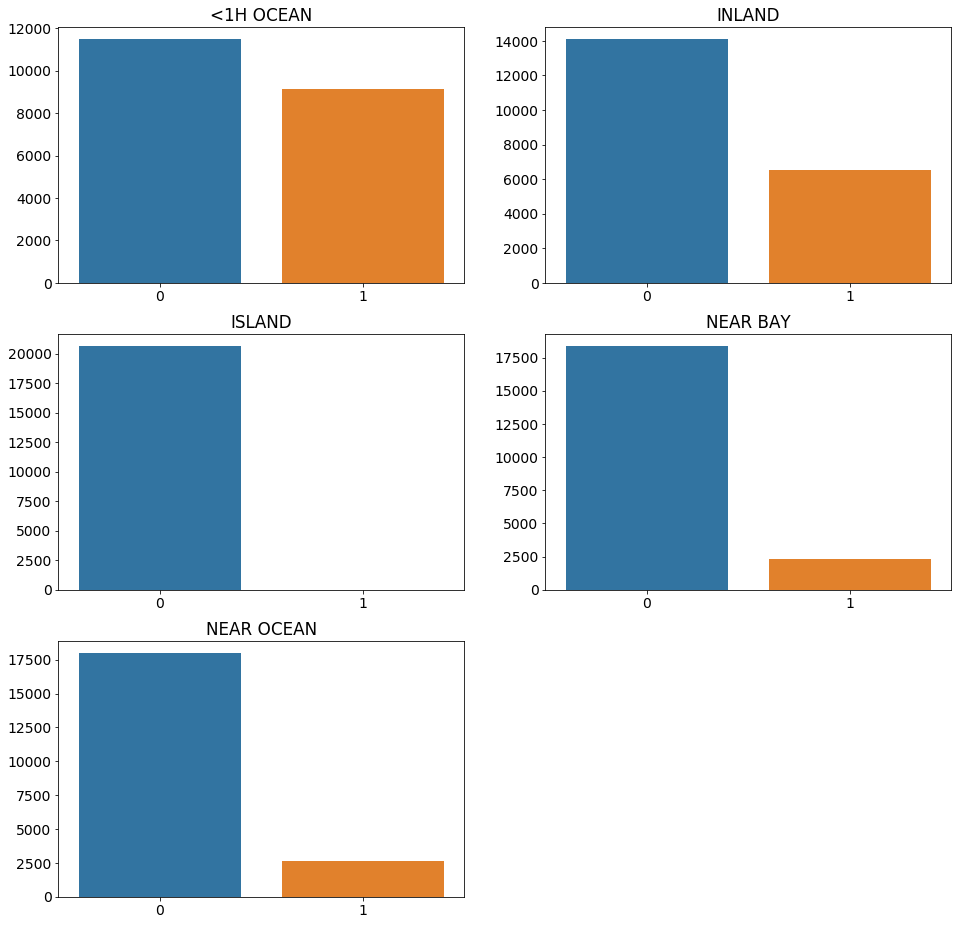

In [79]:
plt.figure(figsize=(16, 16))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3, 2, i+1)
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.4 Матрица корреляций

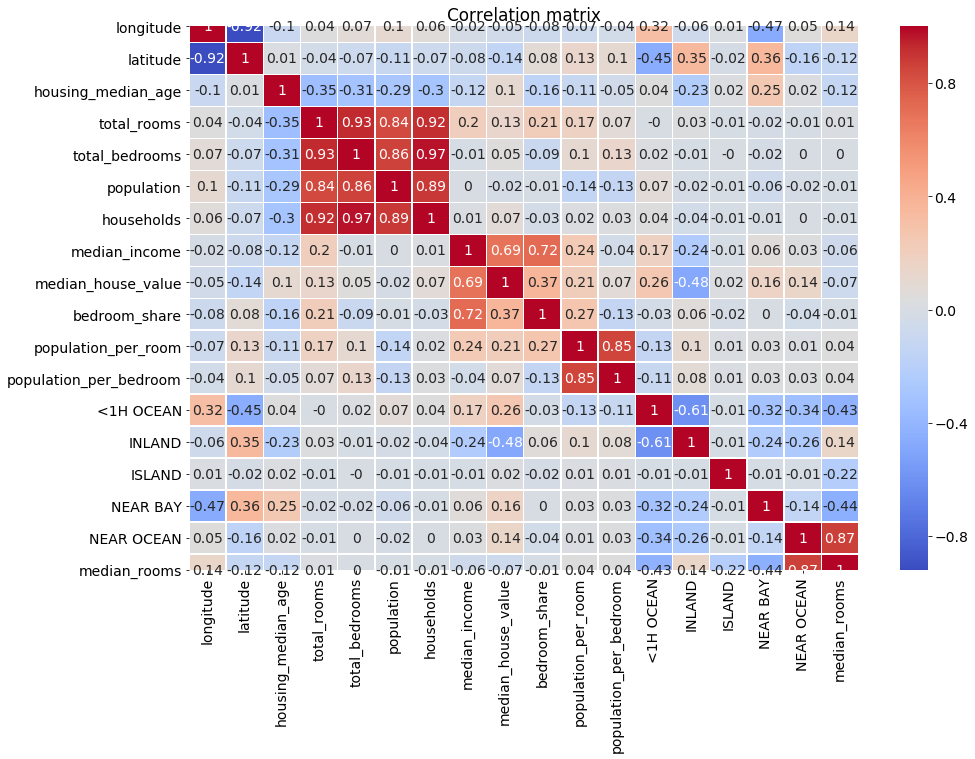

In [81]:
plt.figure(figsize=(15, 10))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

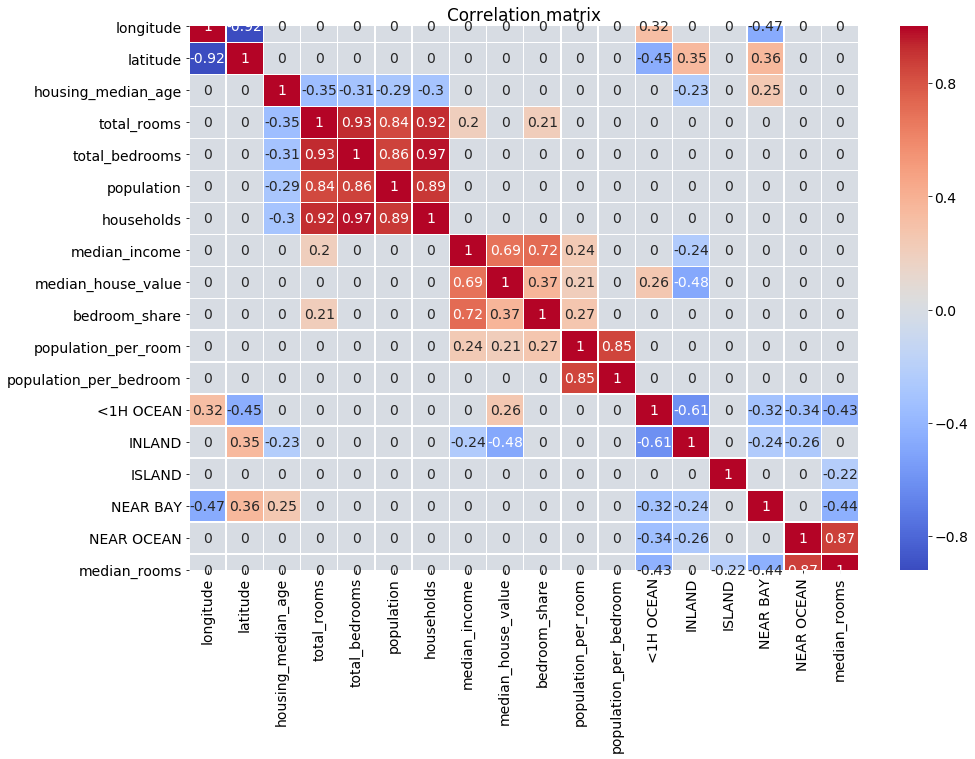

In [83]:
plt.figure(figsize=(15, 10))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## 3. Анализ зависимости таргета от фичей

### 3.1 Количественные признаки

In [84]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_share',
       'population_per_room', 'population_per_bedroom', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_rooms'],
      dtype='object')

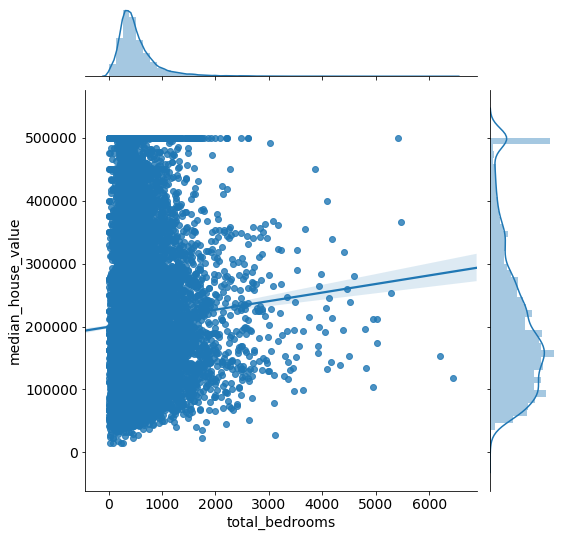

In [85]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [88]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

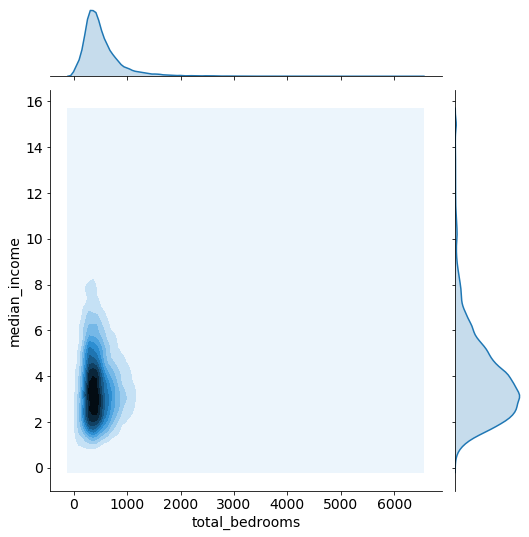

In [86]:
grid = sns.jointplot(df['total_bedrooms'], df['median_income'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

### 3.2 Категориальные/бинарные признаки

In [95]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_share',
       'population_per_room', 'population_per_bedroom', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_rooms', 'namy_bedrooms',
       'many_bedrooms'],
      dtype='object')

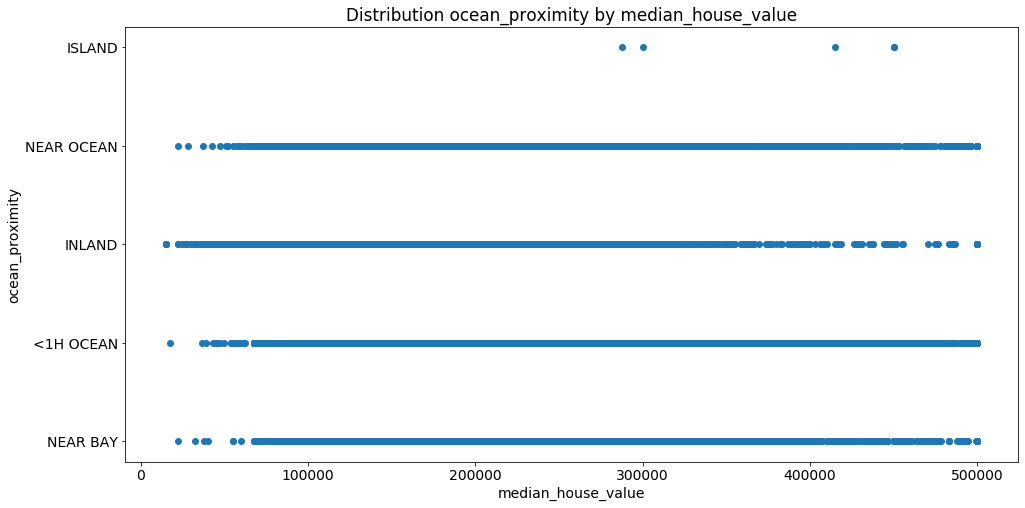

In [96]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution ocean_proximity by median_house_value')

plt.show()

### box plot

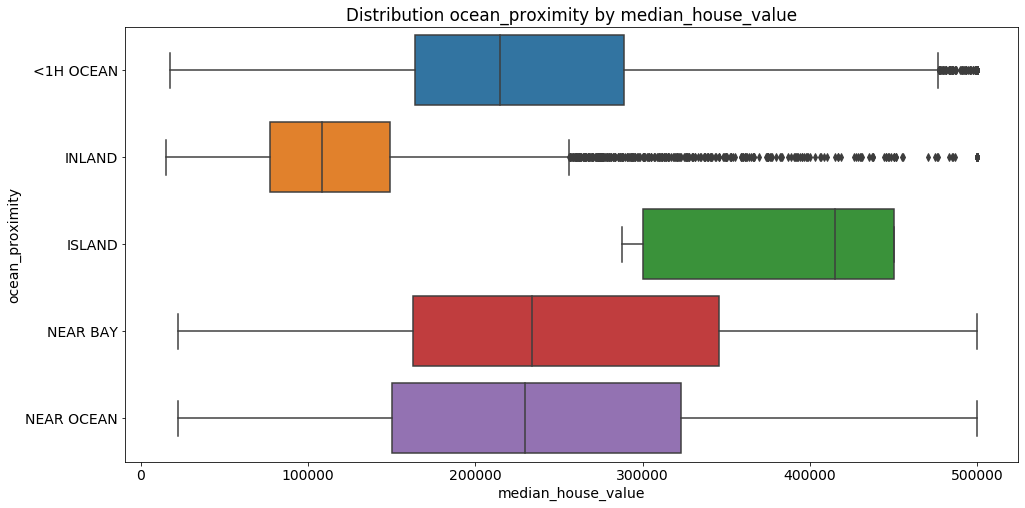

In [97]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])
plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution ocean_proximity by median_house_value')

plt.show()

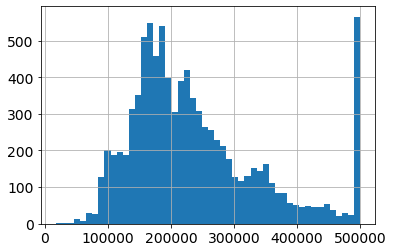

In [105]:
df.loc[df['<1H OCEAN'] == 1, 'median_house_value'].hist(bins=50);

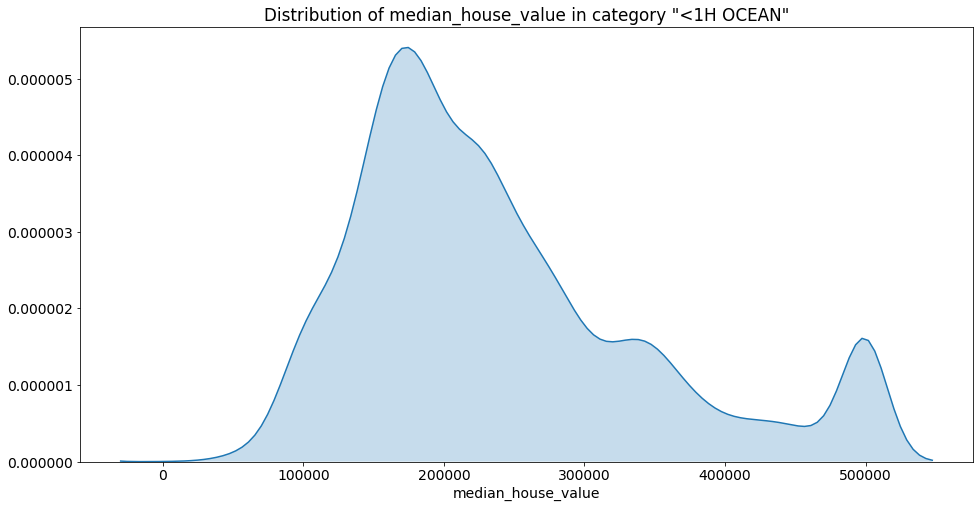

In [107]:
plt.figure(figsize=(16, 8))

sns.kdeplot(df.loc[df['<1H OCEAN'] == 1, 'median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.title('Distribution of median_house_value in category "<1H OCEAN"')
plt.show()

### Violin plot

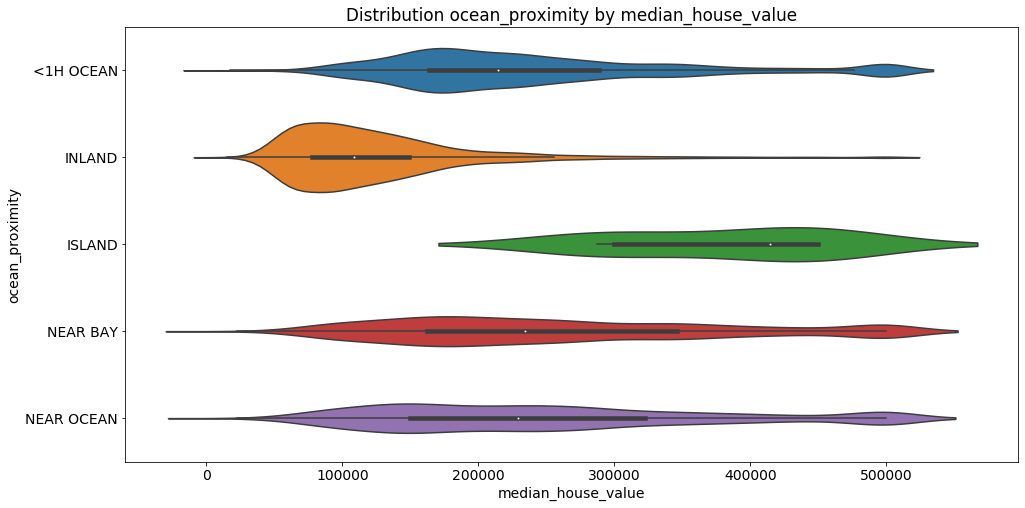

In [108]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])
plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution ocean_proximity by median_house_value')

plt.show()

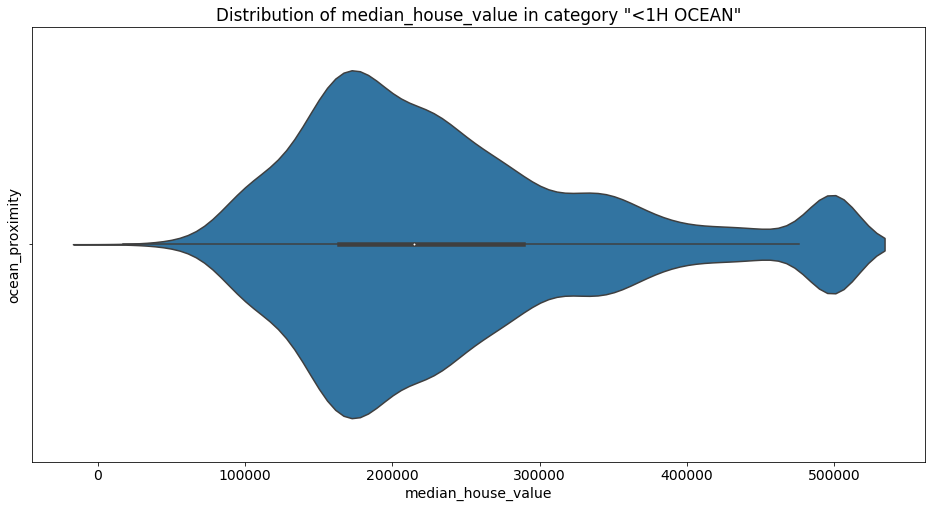

In [110]:
plt.figure(figsize=(16, 8))

sns.violinplot(df.loc[df['<1H OCEAN'] == 1, 'median_house_value'])
plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value in category "<1H OCEAN"')

plt.show()

### 3.3 Гео данные

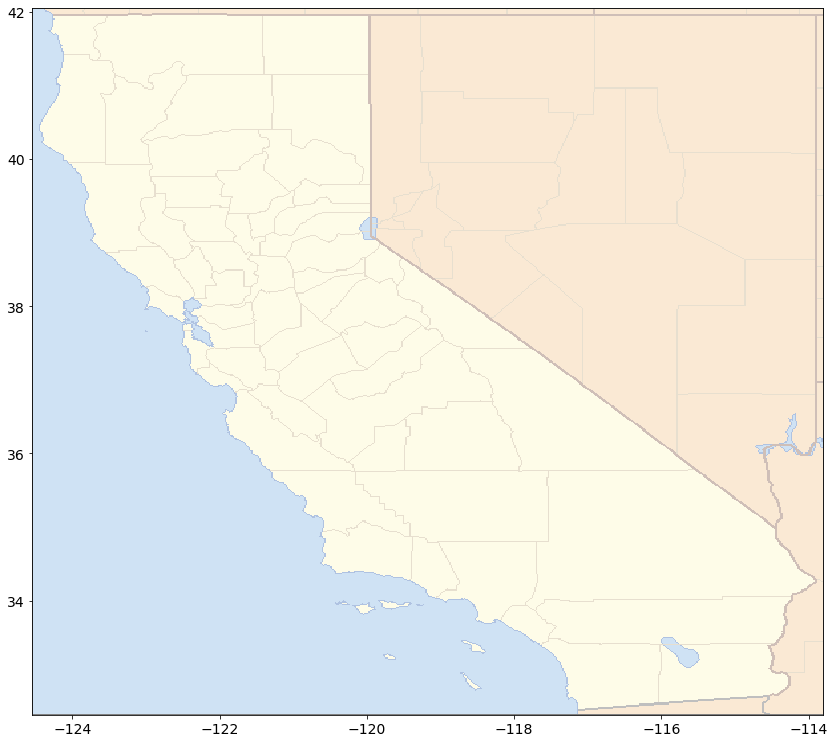

In [111]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20, 13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

In [114]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_share',
       'population_per_room', 'population_per_bedroom', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_rooms', 'namy_bedrooms',
       'many_bedrooms'],
      dtype='object')

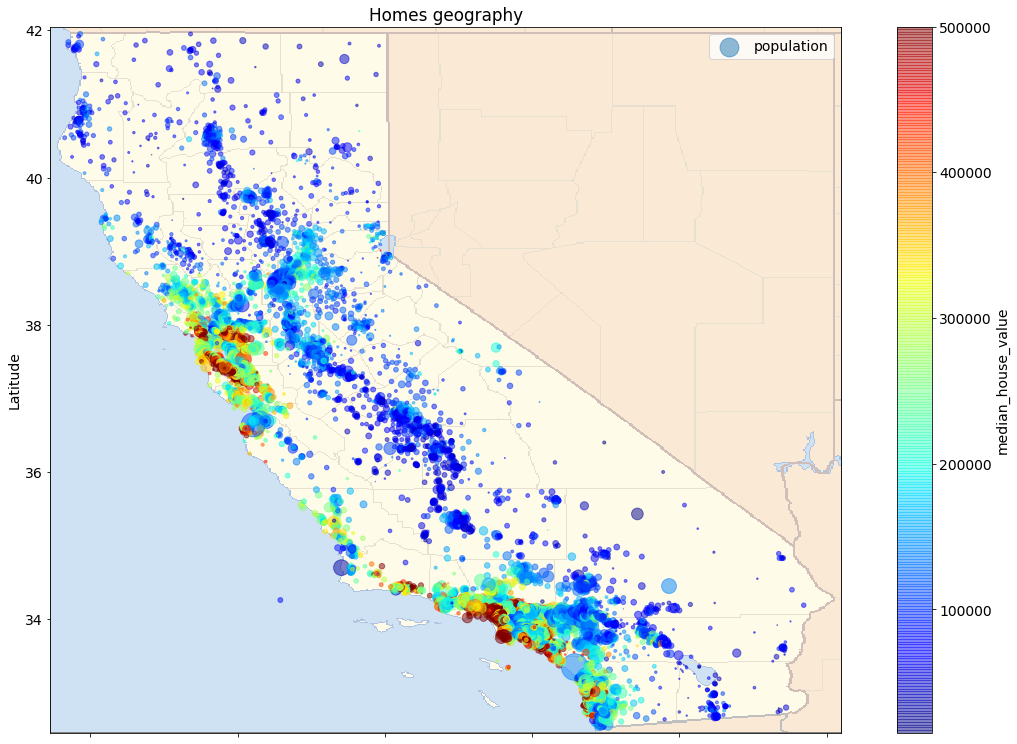

In [113]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
       s=df['population']/50, label='population', c='median_house_value',
       cmap=plt.get_cmap('jet'), figsize=(20, 13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Homes geography')
plt.legend()
plt.show()

In [115]:
#mpip install keplergl

     |████████████████████████████████| 5.4MB 433kB/s eta 0:00:01
     |████████████████████████████████| 931kB 394kB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 423kB/s eta 0:00:01     |███████████▉                    | 604kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 13.9MB 334kB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 141kB/s eta 0:00:01     |███████████████████████████████ | 10.7MB 141kB/s eta 0:00:03     |███████████████████████████████▋| 10.9MB 141kB/s eta 0:00:01


  Created wheel for keplergl: filename=keplergl-0.1.2-py2.py3-none-any.whl size=10853088 sha256=c395136ed37eddd2ac3fd9401a08c3e34d8440a937cb37f9ed0d90d00e5f7ecb
  Stored in directory: /Users/igor/Library/Caches/pip/wheels/94/1a/86/11ce1717bb33848bff11744b67560fc9ceaaa89412673f9132
Successfully built keplergl
Note: you may need to restart the kernel to use updated packages.


In [9]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='data/california.html')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to data/california.html!


### Target encoding

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_share',
       'population_per_room', 'population_per_bedroom', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_rooms'],
      dtype='object')

In [11]:
df[['latitude', 'longitude', 'median_house_value']].head(2)

,latitude,longitude,median_house_value
0,37.88,-122.23,452600.0
1,37.86,-122.22,358500.0


In [13]:
df[['latitude', 'longitude']] = np.round(df[['latitude', 'longitude']], 2)
df[['latitude', 'longitude', 'median_house_value']].head(5)

,latitude,longitude,median_house_value
0,37.88,-122.23,452600.0
1,37.86,-122.22,358500.0
2,37.85,-122.24,352100.0
3,37.85,-122.25,341300.0
4,37.85,-122.25,342200.0


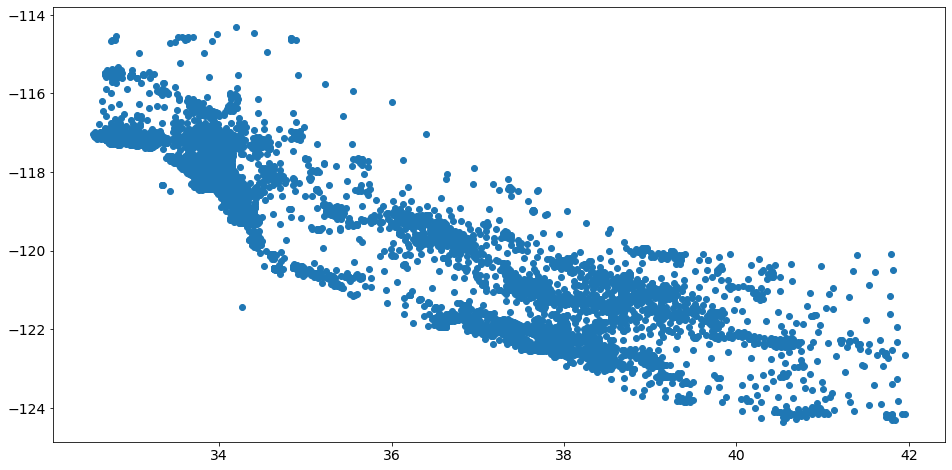

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(df['latitude'], df['longitude'])
plt.show()

In [15]:
df_group = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()
df_group.head(5)

,latitude,longitude,median_house_value
0,32.54,-117.04,67500.0
1,32.55,-117.09,144400.0
2,32.55,-117.06,108800.0
3,32.55,-117.04,93200.0
4,32.56,-117.12,257700.0


In [16]:
df_group.shape[0]

12595

In [21]:
?df.corr

In [22]:
df_group.corr()

,latitude,longitude,median_house_value
latitude,1.000000,-0.910235,-0.211821
longitude,-0.910235,1.000000,-0.009485
median_house_value,-0.211821,-0.009485,1.000000
